## Makemore part 2

- [pytorch docs link](https://pytorch.org/docs/stable/index.html)
- ["A Neural Probabilistic Language Model" by Bengio et al. (2003)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
- [PyTorch internals](http://blog.ezyang.com/2019/05/pytorch-internals/)



The paper "A Neural Probabilistic Language Model" by Bengio et al. introduces a model for predicting words in a sequence of text using a neural network. The model is designed to capture the statistical patterns of word occurrence in a large corpus of text data. The approach is based on a feedforward neural network which is trained on a dataset of sequences of words.

The authors explain that the probability of a word in a sequence depends on the previous words in the sequence. The model they propose provides a way to estimate this probability by considering a fixed number of the previous words as the context. This is achieved by using the neural network to learn a probability distribution over words given the context.

The paper compares the proposed model with a number of traditional language models such as N-Gram and Maximum Entropy models. The results show that the proposed neural model outperforms these models in terms of perplexity, a measure of how well the model predicts the next word in a sequence.

The authors also explore some limitations of their model, such as the inability to handle out-of-vocabulary words, and suggest some areas for future research including investigating the use of recurrent neural networks and larger hidden layers.

Overall, the paper presents a novel approach to text prediction using a neural network that can capture the complex patterns of word occurrence in a large corpus of text and outperforms traditional language models.


In [128]:
"""
we'll now go deeper into the makemore project
prevously we've been taking only one character, and putting it into the neural network
moving forward we'll increase the complexity by taking n characters, and putting them into the neural network


multi layer perceptron model (MLP)
    - input layer -
    - hidden layer - hyperparameter (number of neurons, activation function, etc. decided by the user)
    - output layer - softmax function (converts the output into a probability distribution)
    - "A neural Porbabilistic Language Model" by Bengio et al. (2003)
    the following were prompted by copilot for further reading :
        - "Efficient Estimation of Word Representations in Vector Space" by Mikolov et al. (2013)
        - "Distributed Representations of Words and Phrases and their Compositionality" by Mikolov et al. (2013)
        - "GloVe: Global Vectors for Word Representation" by Pennington et al. (2014)
        - "Neural Machine Translation by Jointly Learning to Align and Translate" by Bahdanau et al. (2014)
        - "Sequence to Sequence Learning with Neural Networks" by Sutskever et al. (2014)
        - "A Neural Conversational Model" by Vinyals et al. (2015)
        - "Attention is All You Need" by Vaswani et al. (2017)
        - "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Devlin et al. (2018)
        - "Language Models are Unsupervised Multitask Learners" by Radford et al. (2019)
        - "XLNet: Generalized Autoregressive Pretraining for Language Understanding" by Yang et al. (2019)
        - "Language Models are Few-Shot Learners" by Brown et al. (2020)
        - "GPT-3: Language Models are Few-Shot Learners" by Brown et al. (2020)

  Neural Network with Vectors: Now imagine a neural network as a black box with an arrow 
  (representing your input vector) going in one side and another arrow (representing your output vector) 
  coming out the other side. Inside the box, the input vector gets multiplied by a matrix 
  (which you can think of as a grid of numbers, or a 2-dimensional tensor), goes through an 
  activation function (like ReLU, which sets all negative numbers to zero), and then the process 
  might repeat with another matrix and another activation function, and so on until we reach the output.      
        

"""

'\nwe\'ll now go deeper into the makemore project\nprevously we\'ve been taking only one character, and putting it into the neural network\nmoving forward we\'ll increase the complexity by taking n characters, and putting them into the neural network\n\n\nmulti layer perceptron model (MLP)\n    - input layer -\n    - hidden layer - hyperparameter (number of neurons, activation function, etc. decided by the user)\n    - output layer - softmax function (converts the output into a probability distribution)\n    - "A neural Porbabilistic Language Model" by Bengio et al. (2003)\n    the following were prompted by copilot for further reading :\n        - "Efficient Estimation of Word Representations in Vector Space" by Mikolov et al. (2013)\n        - "Distributed Representations of Words and Phrases and their Compositionality" by Mikolov et al. (2013)\n        - "GloVe: Global Vectors for Word Representation" by Pennington et al. (2014)\n        - "Neural Machine Translation by Jointly Lear

In [129]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# read in all of the words, using the name.txt file in the data folder

words = open('data/names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [131]:
# build the vocabulary of characters and mappings to & from integers

chars = sorted(list(set(''.join(words)))) # sorted list of unique characters
stoi = { s:i+1 for i,s in enumerate(chars) } # string to int
stoi['.'] = 0 # special character for end of word
itos = { i:s for s,i in stoi.items() } # int to string
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [132]:
# build the dataset

block_size = 3 # number of characters to feed into the network
X, Y = [], [] # input and output sequences
for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.': # add end of word marker
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [133]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [134]:
# build a dataset function

block_size = 3 # number of characters to feed into the network

def build_dataset(words):
    X, Y = [], [] # input and output sequences
    
    for w in words:    
        context = [0] * block_size # start of word marker
        for ch in w + '.': # add end of word marker
            ix = stoi[ch] # convert character to integer
            X.append(context) # add input sequence
            Y.append(ix) # add output sequence
            context = context[1:] + [ix] # shift context to the right and add the new character
    
    X = torch.tensor(X) # convert to tensors
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42) # for reproducibility
random.shuffle(words) # shuffle the words
n1 = int(0.8*len(words)) # 80% train
n2 = int(0.9*len(words)) # 10% dev

Xtr, Ytr = build_dataset(words[:n1]) # build train set
Xdev, Ydev = build_dataset(words[n1:n2]) # build dev set
Xte, Yte = build_dataset(words[n2:]) # build test set
# this is done to prevent the model from overfitting on the training data

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [135]:
C = torch.randn((27, 2))

In [136]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [137]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [138]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)

In [139]:
h

tensor([[ 0.0541, -0.9676,  0.9999,  ..., -0.9998,  0.9958,  0.1120],
        [-0.6359, -0.9859,  0.9998,  ..., -0.9999,  0.9937,  0.0739],
        [-0.9999, -0.9998,  0.9896,  ..., -1.0000,  0.9604, -0.3502],
        ...,
        [-0.9994, -0.9953,  0.3899,  ..., -1.0000,  0.9081, -0.1141],
        [-0.9815,  0.0914, -0.6705,  ...,  0.9968,  0.9758, -0.8618],
        [ 0.9998, -0.9038,  0.9880,  ..., -0.9372,  0.8705,  0.9986]])

In [140]:
h.shape

torch.Size([228146, 100])

In [141]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [142]:
logits = h @ w2 + b2

In [143]:
logits.shape

torch.Size([228146, 27])

In [144]:
counts = logits.exp()


In [145]:
probs = counts / counts.sum(1, keepdim=True)  
probs.shape  

torch.Size([228146, 27])

In [146]:
#loss = -probs[torch.arange(32), Y].log().mean()
#loss

# this isnt going to work anymore, as we changed the original loop to include more than just the first 5 names
# see below for a cleaned up way to go through the whole dataset

In [147]:
g = torch.Generator().manual_seed(2147483647) # used seed for reproducibility
C = torch.randn((27, 10), generator=g) # random embeddings
W1 = torch.randn((30, 200), generator=g) # random weights
b1 = torch.randn(200, generator=g) # random biases
W2 = torch.randn((200, 27), generator=g) # random weights
b2 = torch.randn(27, generator=g) # random biases
parameters = [C, W1, b1, W2, b2] # list of parameters

In [148]:
sum(p.nelement() for p in parameters) # number of parameters

11897

In [149]:
for p in parameters:
    p.requires_grad = True # enable gradients

In [150]:
lre = torch.linspace(-3, 0, 1000) # learning rate values
lrs = 10 ** lre # learning rate scales

In [151]:
lri = []
lossi = []
stepi = []

In [152]:
for i in range (200000):

    # minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]   # embeddings
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # hidden layer
    logits = h @ W2 + b2 # output layer
    loss = F .cross_entropy(logits, Ytr[ix]) # cross-entropy loss

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update 
    lr = 0.1 if i < 10000 else 0.01 # learning rate
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())


1.9816190004348755


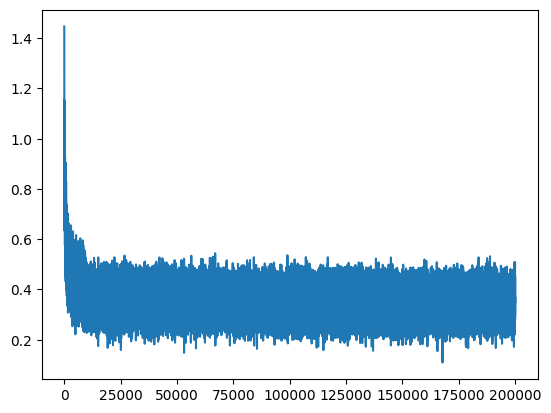

In [153]:
plt.plot(stepi, lossi)

In [154]:
# this shows the loss on the entire training set, just for reference
emb = C[Xtr]   
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # hidden layer
logits = h @ W2 + b2 # output layer
loss = F .cross_entropy(logits, Ytr) # cross-entropy loss
loss

tensor(2.2318, grad_fn=<NllLossBackward0>)

In [155]:
# this shows the loss on the entire dev set, just for reference
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2471, grad_fn=<NllLossBackward0>)

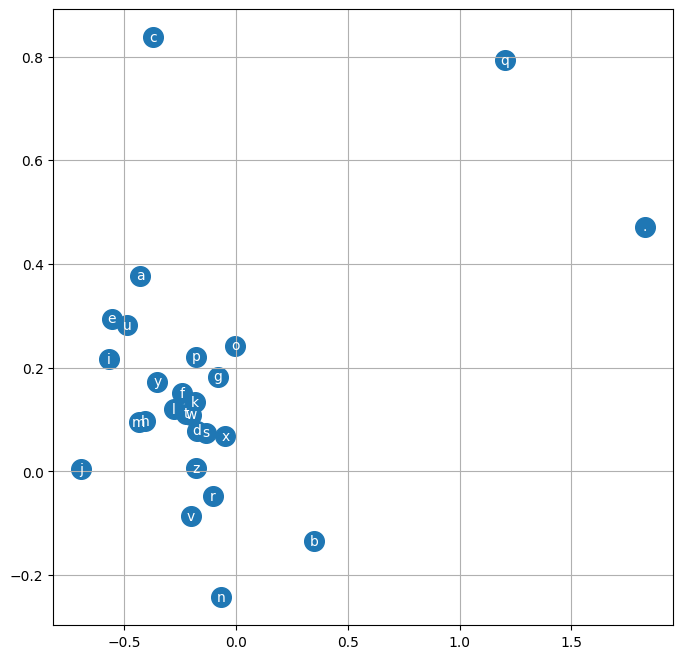

In [156]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [157]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [161]:
# sample from the model

# sample from the model
g = torch.Generator().manual_seed(2)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

annah.
say.
deveerhar.
collie.
avir.
cammendo.
dailonan.
triyacarbamoniannelynna.
ebellesh.
et.
zadielan.
bo.
ked.
eam.
brayna.
shanvalan.
casalekont.
zeck.
chec.
esde.
